# Imports
---

In [61]:
import pandas as pd
import numpy as np
import math

# Import Dataset
---
**Column Description (Data Source: [Smoking and Drinking Dataset with body signal on Kaggle](https://www.kaggle.com/datasets/sooyoungher/smoking-drinking-dataset/data))**

- Sex - male, female
- Age - round up to 5 year
- Height - round up to 5 cm[cm]
- Weight [kg]
- Waistline
- Sight_left - eyesight(left) the column shows how well the left eye sees, where perfect vision = 1.0
- Sight_right - eyesight(right) the column shows how well the right eye sees where perfect vision = 1.0
- Hear_left - hearing left, 1(normal), 2(abnormal)
- Hear_right - hearing right, 1(normal), 2(abnormal)
- SBP - Systolic blood pressure[mmHg]
- DBP - Diastolic blood pressure[mmHg]
- BLDS - BLDS or FSG(fasting blood glucose)[mg/dL]
- Tot_chole - total cholesterol[mg/dL]
- HDL_chole - HDL cholesterol[mg/dL] - the only fraction of cholesterol that is called "good", "useful" cholesterol.
- LDL_chole - LDL cholesterol[mg/dL]
- Triglyceride - triglyceride[mg/dL]
- Hemoglobin - hemoglobin[g/dL]
- Urine_protein - protein in urine, 1(-), 2(+/-), 3(+1), 4(+2), 5(+3), 6(+4)
- Serum_creatinine - serum(blood) creatinine[mg/dL]
- SGOT_AST - SGOT(Glutamate-oxaloacetate transaminase) AST(Aspartate transaminase)[IU/L]
- SGOT_ALT - ALT(Alanine transaminase)[IU/L]
- Gamma_GTP - y-glutamyl transpeptidase[IU/L]
- SMK_stat_type_cd - Smoking state, 1(never), 2(used to smoke but quit), 3(still smoke)
- DRK_YN - Drinker or Not


In [62]:
def percentage_missing_values(data):
    total_cells = np.product(data.shape)

    missing_cells = data.isnull().sum().sum()

    percentage_missing = (missing_cells / total_cells) * 100
    return f"Percentage of missing values: {percentage_missing:.2f}%"

In [63]:
df = pd.read_csv('data/sd.csv')
df_copy = df.copy()
df_copy.head()
df.to_csv('outpu.csv', index=False)

In [64]:
percentage_missing_values(df_copy)

'Percentage of missing values: 0.00%'

# Useful functions
---

In [65]:
def remove_outliers_from_columns(df, column_names):

    for column_name in column_names:
        # Calculate Q1, Q3, and IQR
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1

        # Define bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Filter out outliers
        df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    return df



In [66]:
def percentage_missing_values(data):
    total_cells = np.product(data.shape)

    missing_cells = data.isnull().sum().sum()

    percentage_missing = (missing_cells / total_cells) * 100
    return f"Percentage of missing values: {percentage_missing:.2f}%"


In [67]:
def duplicate_data(data):

    duplicates_cells = data[data.duplicated].shape
    
    return f"Number of duplicates: {duplicates_cells[0]}"

# Clean data
---
- Remove outliers
- Remove duplicates
- impute missing values

## Remove Outliers
---

In [68]:
df_copy.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,...,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000,991346.000000
mean,47.614491,162.240625,63.284050,81.233358,0.980834,0.978429,1.031495,1.030476,122.432498,76.052627,...,56.936800,113.037692,132.141751,14.229824,1.094224,0.860467,25.989308,25.755051,37.136347,1.608122
std,14.181339,9.282957,12.514241,11.850323,0.605949,0.604774,0.174650,0.171892,14.543148,9.889365,...,17.238479,35.842812,102.196985,1.584929,0.437724,0.480530,23.493386,26.308599,50.424153,0.818507
min,20.000000,130.000000,25.000000,8.000000,0.100000,0.100000,1.000000,1.000000,67.000000,32.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.100000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,55.000000,74.100000,0.700000,0.700000,1.000000,1.000000,112.000000,70.000000,...,46.000000,89.000000,73.000000,13.200000,1.000000,0.700000,19.000000,15.000000,16.000000,1.000000
50%,45.000000,160.000000,60.000000,81.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,111.000000,106.000000,14.300000,1.000000,0.800000,23.000000,20.000000,23.000000,1.000000
75%,60.000000,170.000000,70.000000,87.800000,1.200000,1.200000,1.000000,1.000000,131.000000,82.000000,...,66.000000,135.000000,159.000000,15.400000,1.000000,1.000000,28.000000,29.000000,39.000000,2.000000
max,85.000000,190.000000,140.000000,999.000000,9.900000,9.900000,2.000000,2.000000,273.000000,185.000000,...,8110.000000,5119.000000,9490.000000,25.000000,6.000000,98.000000,9999.000000,7210.000000,999.000000,3.000000


In [69]:
df_copy = remove_outliers_from_columns(df_copy, ['waistline','SBP', 'DBP','BLDS','tot_chole','triglyceride','serum_creatinine','SGOT_AST', 'SGOT_ALT','sight_left','sight_right','gamma_GTP'])

In [70]:
df_copy.describe()

,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,DBP,...,HDL_chole,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd
count,676654.000000,676654.000000,676654.000000,676654.000000,676654.000000,676654.000000,676654.000000,676654.000000,676654.000000,676654.000000,...,676654.000000,676654.000000,676654.000000,676654.000000,676654.000000,676654.000000,676654.000000,676654.000000,676654.000000,676654.000000
mean,46.909824,161.324872,60.784027,79.027450,0.944601,0.942262,1.029503,1.028521,119.854122,74.367279,...,58.757409,112.626100,105.011242,13.968156,1.069199,0.827369,22.006646,19.127022,22.095479,1.490010
std,14.451683,9.171283,11.280088,8.972096,0.327505,0.327287,0.169210,0.166457,12.957561,8.642721,...,14.969314,31.830963,50.361684,1.527757,0.355467,0.188520,5.596770,7.797004,10.720541,0.767761
min,20.000000,130.000000,25.000000,53.600000,0.100000,0.100000,1.000000,1.000000,84.000000,54.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.300000,6.000000,1.000000,1.000000,1.000000
25%,35.000000,155.000000,50.000000,72.500000,0.700000,0.700000,1.000000,1.000000,110.000000,69.000000,...,48.000000,90.000000,67.000000,13.000000,1.000000,0.700000,18.000000,13.000000,14.000000,1.000000
50%,45.000000,160.000000,60.000000,79.000000,1.000000,1.000000,1.000000,1.000000,120.000000,74.000000,...,57.000000,111.000000,94.000000,13.900000,1.000000,0.800000,21.000000,18.000000,19.000000,1.000000
75%,55.000000,170.000000,70.000000,85.000000,1.200000,1.200000,1.000000,1.000000,130.000000,80.000000,...,67.000000,133.000000,132.000000,15.100000,1.000000,1.000000,25.000000,23.000000,28.000000,2.000000
max,85.000000,190.000000,125.000000,108.300000,1.900000,1.900000,2.000000,2.000000,159.000000,97.000000,...,933.000000,1750.000000,272.000000,25.000000,6.000000,1.400000,41.000000,44.000000,56.000000,3.000000


## Remove Duplicates
---

In [71]:
duplicate_data(df_copy)

'Number of duplicates: 14'

In [72]:
df_copy = df_copy.drop_duplicates(keep= 'last')

In [73]:
duplicate_data(df_copy)

'Number of duplicates: 0'

## Impute Missing Values 
---

In [74]:
percentage_missing_values(df_copy)

'Percentage of missing values: 0.00%'

In [75]:
"""print(df_copy.select_dtypes(include=[object,bool]).columns)"""

'print(df_copy.select_dtypes(include=[object,bool]).columns)'

In [76]:
"""df_copy.info()"""

'df_copy.info()'

### Modeling with One Hot Encoding

In [77]:
import random
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, r2_score, mean_squared_error,classification_report
import matplotlib.pyplot as plt
import seaborn 
%matplotlib inline

In [78]:
categ = df_copy.select_dtypes(include=["object", "category"]).columns.to_list()
num = df_copy.select_dtypes(exclude=["object", "category"]).columns.to_list()

num.remove('SMK_stat_type_cd')
preprocessor = make_column_transformer(
        (OneHotEncoder(), categ),
        (StandardScaler(), num)
    )


Classifier Function

In [79]:
def evaluate_classifier_metrics(classifier, X_train, y_train, X_test, y_test):

    classifier.fit(X_train, y_train)

    test_predictions = classifier.predict(X_test)
    train_predictions = classifier.predict(X_train)
    print('Train Set Classification Results:')
    print(classification_report(y_train,train_predictions))
    print('\nTest Set Classification Results:')
    print(classification_report(y_test,test_predictions))

KNN Classifier

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

X = df_copy.drop('SMK_stat_type_cd',axis=1)
y = df_copy['SMK_stat_type_cd'] 

X = preprocessor.fit_transform(X)
knn_classifier = KNeighborsClassifier(n_neighbors=4)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)
knn_metrics = evaluate_classifier_metrics(knn_classifier, X_train, y_train, X_test, y_test)

Train Set Classification Results:
              precision    recall  f1-score   support

         1.0       0.86      0.94      0.90    367986
         2.0       0.61      0.54      0.57     81403
         3.0       0.68      0.48      0.56     91923

    accuracy                           0.80    541312
   macro avg       0.72      0.65      0.68    541312
weighted avg       0.79      0.80      0.79    541312


Test Set Classification Results:
              precision    recall  f1-score   support

         1.0       0.80      0.89      0.84     91974
         2.0       0.37      0.32      0.34     20400
         3.0       0.43      0.30      0.36     22954

    accuracy                           0.70    135328
   macro avg       0.54      0.50      0.52    135328
weighted avg       0.68      0.70      0.69    135328


Logistic Regression

In [81]:
logistic_classifier = LogisticRegression()
print("Logistic Regression Metrics:")
logistic_metrics = evaluate_classifier_metrics(logistic_classifier, X_train, y_train, X_test, y_test)


Logistic Regression Metrics:
Train Set Classification Results:
              precision    recall  f1-score   support

         1.0       0.83      0.88      0.86    367986
         2.0       0.46      0.33      0.38     81403
         3.0       0.48      0.49      0.49     91923

    accuracy                           0.73    541312
   macro avg       0.59      0.57      0.58    541312
weighted avg       0.72      0.73      0.72    541312


Test Set Classification Results:
              precision    recall  f1-score   support

         1.0       0.83      0.88      0.86     91974
         2.0       0.46      0.33      0.38     20400
         3.0       0.48      0.50      0.49     22954

    accuracy                           0.73    135328
   macro avg       0.59      0.57      0.58    135328
weighted avg       0.72      0.73      0.72    135328


# PCA
---

In [82]:
# if fanalysis is already installed, import it - else install and import it
try:
    from fanalysis.pca import PCA
except:
    !pip install fanalysis
    from fanalysis.pca import PCA

# PCA Copy
---

In [83]:
pca_copy = df_copy.copy()

# Create Variable Mappings
---

In [84]:
pca_copy['SMK_stat_type_cd'] = pca_copy['SMK_stat_type_cd'].map({1: 'N', 2: 'Q', 3: 'S'}) # Smoking state, 1(never) = N , 2(used to smoke but quit) = Q, 3(still smoke) = S
pca_copy['hear_left'] = pca_copy['hear_left'].map({1: 'Normal', 2: 'Abnormal'})
pca_copy['hear_right'] = pca_copy['hear_right'].map({1: 'Normal', 2: 'Abnormal'})
pca_copy['urine_protein'] = pca_copy['urine_protein'].map({1: '-', 2: '+/-', 3: '+1', 4: '+2', 5: '+3', 6: '+4'})

In [85]:
pca_copy.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,Normal,Normal,120.0,...,126.0,92.0,17.1,-,1.0,21.0,35.0,40.0,N,Y
1,Male,30,180,80,89.0,0.9,1.2,Normal,Normal,130.0,...,148.0,121.0,15.8,-,0.9,20.0,36.0,27.0,S,N
3,Male,50,175,80,91.0,1.5,1.2,Normal,Normal,145.0,...,104.0,106.0,17.6,-,1.1,29.0,34.0,18.0,N,N
4,Male,50,165,60,80.0,1.0,1.2,Normal,Normal,138.0,...,117.0,104.0,13.8,-,0.8,19.0,12.0,25.0,N,N
5,Male,50,165,55,75.0,1.2,1.5,Normal,Normal,142.0,...,95.0,232.0,13.8,+1,0.8,29.0,40.0,37.0,S,Y


# Standard Scaling
---
- PCA works by identifying the directions (principal components) in which the data varies the most. If the features are on different scales, the features with higher magnitude (regardless of their actual variance in the data) will dominate the first principal components, potentially leading to misleading results. Standardizing ensures that all features contribute equally to the calculation of the principal components.
- PCA is sensitive to the mean of the data. By subtracting the mean of each feature from the data, standard scaling centers the data around the origin. This is important because PCA identifies the principal components using covariance or correlation, both of which are affected by the mean of the data.

In [86]:
from sklearn.preprocessing import StandardScaler


quantitative_columns = pca_copy.select_dtypes(include=[np.number]).columns.tolist()
data_quantitative = pca_copy[quantitative_columns]

scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_quantitative)

D = pd.DataFrame(data = data_standardized, columns = quantitative_columns)
# define dimensions of [X] matrix : number of variables
p = D.shape[1]

# define sample size of [X] : number of observations
n = D.shape[0]

# define values of matrix [X]
X = D.values

print(D.head())
# print dataset summary
print(D.info())

        age    height    weight  waistline  sight_left  sight_right       SBP  \
0 -0.824115  0.945905  1.260278   1.222973    0.169151     0.176412  0.011263   
1 -1.170097  2.036267  1.703537   1.111516   -0.136186     0.787496  0.783017   
2  0.213830  1.491086  1.703537   1.334430    1.695835     0.787496  1.940647   
3  0.213830  0.400724 -0.069500   0.108403    0.169151     0.787496  1.400420   
4  0.213830  0.400724 -0.512759  -0.448882    0.779824     1.704122  1.709121   

        DBP      BLDS  tot_chole  HDL_chole  LDL_chole  triglyceride  \
0  0.651736  0.383969   0.016305  -0.718640   0.420158     -0.258352   
1  0.883145  1.012019   1.038141  -0.251018   1.111309      0.317481   
2  1.461669  0.025084   0.249867   1.151849  -0.270993      0.019636   
3  0.883145  0.563412   0.191477   0.149801   0.137414     -0.020076   
4  2.040194  0.383969   0.746188   1.218653  -0.553737      2.521534   

   hemoglobin  serum_creatinine  SGOT_AST  SGOT_ALT  gamma_GTP  
0    2.049989  

# Instantiate acp object form PCA class
---

In [87]:
acp = PCA(std_unit=True,row_labels=D.index,col_labels=D.columns)

# run PCA on X observed data
acp.fit(X)

# print methods and attributes of acp object
dir(acp)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_compute_stats',
 '_compute_svd',
 '_get_default_requests',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_validate_data',
 '_validate_params',
 'col_contrib_',
 'col_coord_',
 'col_cor_',
 'col_cos2_',
 'col_labels',
 'col_labels_',
 'col_labels_short_',
 'col_topandas',
 'correlation_circle',
 'eig_',
 'eigen_vectors_',
 'fit',
 'fit_transform',
 'get_metadata_r

In [88]:
acp.col_labels

Index(['age', 'height', 'weight', 'waistline', 'sight_left', 'sight_right',
       'SBP', 'DBP', 'BLDS', 'tot_chole', 'HDL_chole', 'LDL_chole',
       'triglyceride', 'hemoglobin', 'serum_creatinine', 'SGOT_AST',
       'SGOT_ALT', 'gamma_GTP'],
      dtype='object')

In [89]:
acp.row_labels

RangeIndex(start=0, stop=676640, step=1)

# Determine the number of factors
---

In [90]:
# print eigenvalues (the lambdas) - output includes proportion of variance explained and cumulated values thereof
print(acp.eig_)

# row 1 : lambda 1, lambda 2, ..., lambda k
# IP is the sum of lambda
# row 2 : lambda 1 / IP, lambda 2 / IP, ..., lambda k/ IP
# Cumulative 

[[4.16742118e+00 2.68035122e+00 1.89011580e+00 1.39534532e+00
  1.31652025e+00 1.12678535e+00 9.00253674e-01 8.03862698e-01
  7.78148573e-01 6.18201130e-01 5.34308293e-01 4.84694550e-01
  3.54456760e-01 2.80004256e-01 2.79548589e-01 2.66924055e-01
  1.10775592e-01 1.22827124e-02]
 [2.31523399e+01 1.48908401e+01 1.05006433e+01 7.75191844e+00
  7.31400138e+00 6.25991862e+00 5.00140930e+00 4.46590388e+00
  4.32304763e+00 3.43445072e+00 2.96837941e+00 2.69274750e+00
  1.96920422e+00 1.55557920e+00 1.55304772e+00 1.48291142e+00
  6.15419954e-01 6.82372910e-02]
 [2.31523399e+01 3.80431800e+01 4.85438233e+01 5.62957418e+01
  6.36097432e+01 6.98696618e+01 7.48710711e+01 7.93369749e+01
  8.36600226e+01 8.70944733e+01 9.00628527e+01 9.27556002e+01
  9.47248044e+01 9.62803836e+01 9.78334313e+01 9.93163428e+01
  9.99317627e+01 1.00000000e+02]]


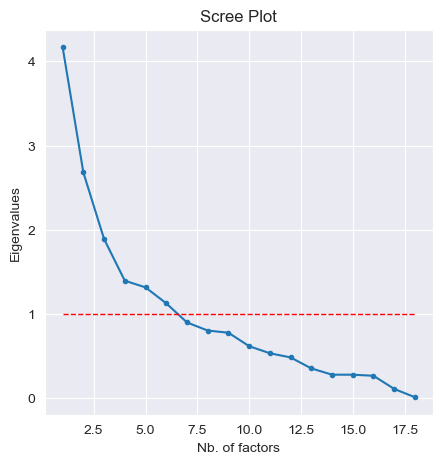

In [91]:
# print scree plot

# first the main plot
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(1,p+1),acp.eig_[0],".-")
ax.set_xlabel("Nb. of factors")
ax.set_ylabel("Eigenvalues")
plt.title("Scree Plot")

# add Kaiser's threshold line
ax.plot([1,p],[1,1],"r--",linewidth=1)

plt.show()

# Dimensionality Reduction from 18 to 6 using PCA

Principal Component Analysis (PCA) is a widely used technique for dimensionality reduction in data analysis and machine learning. It transforms the original variables to a new set of variables, the principal components, which are orthogonal (at right angles to each other), and which reflect the maximum variance in the data.

## The Kaiser-Guttman Rule

The Kaiser-Guttman rule is a popular criterion for selecting the number of principal components to retain in a PCA. According to this rule, we should only keep the components with eigenvalues greater than 1.

In our specific case, applying the Kaiser-Guttman rule suggests that we should retain 6 principal components.

## Importance of Reducing from 18 to 6 Dimensions

In conclusion, reducing the dimensionality of the dataset from 18 to 6 using PCA, guided by the Kaiser-Guttman rule, not only simplifies the dataset but also enhances the efficiency and performance of subsequent analyses and models, while potentially improving our understanding of the underlying patterns in the data.


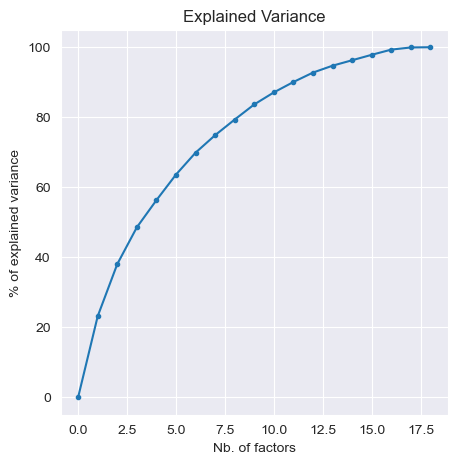

In [92]:
# print explained variance plot

fig, ax = plt.subplots(figsize=(5,5))
ax.plot(range(0,p+1),np.append(0,acp.eig_[2]),".-")
ax.set_xlabel("Nb. of factors")
ax.set_ylabel("% of explained variance")
plt.title("Explained Variance")

plt.show()

In [93]:
print(f'\nExplained Variance by the first 6 components: {sum(acp.eig_[1][:6]):.2f} %')


Explained Variance by the first 6 components: 69.87 %


In [94]:
# Applying Barlett's test of Sphericity
# import statistical package from scipy
import scipy.stats as stats

# Bartlett's statistic
C = -(n-1-(2*p+5)/6) * np.sum(np.log(acp.eig_[0]))
print(f"Barlett's statistics: {C:.3f}")

# degree of freedom
ddl = p*(p-1)/2

# p-value
print(f"p-value: {1-stats.chi2.cdf(C,df=ddl):.3f}")

Barlett's statistics: 6857070.377
p-value: 0.000


### Bartlett’s Test of Sphericity Results

#### Interpretation:
- **Bartlett’s Test Statistic:** 6,857,070.377
- This is a large value, indicating strong evidence against the null hypothesis.

- **P-value:** 0.000
- A p-value of 0.000 (which might be rounded and actually be a very small number, but not exactly zero) indicates that the probability of observing a test statistic as extreme as this, assuming the null hypothesis is true, is virtually zero.

#### Conclusion:
Since the p-value is extremely low, we reject the null hypothesis of Bartlett’s test of sphericity. This suggests that there is significant evidence in the data to indicate that the variables are correlated. This is a positive indication if you are planning to proceed with factor analysis or PCA, as these techniques assume that there are relationships between the variables that can be captured by underlying factors or principal components. In other words, the test result suggests that your data is likely suitable for these types of dimensionality reduction techniques.


# Variables representation
---

In [95]:
# Correlation between variables and factors
print(pd.DataFrame(acp.col_coord_[:,:6],index=D.columns, columns=['F1','F2','F3','F4','F5','F6']))

                        F1        F2        F3        F4        F5        F6
age               0.132838 -0.750102  0.122259 -0.045359  0.002037 -0.152652
height            0.529434  0.614473  0.051980  0.029836  0.154168  0.303405
weight            0.782006  0.302726  0.085555  0.109947  0.194569  0.108653
waistline         0.747754 -0.098083  0.134854  0.095453  0.200450 -0.047699
sight_left        0.088185  0.684257 -0.235763  0.097115 -0.345093 -0.407045
sight_right       0.093083  0.680264 -0.235616  0.098188 -0.344798 -0.410065
SBP               0.465984 -0.384275  0.143765  0.529859 -0.404471  0.088381
DBP               0.458092 -0.264185  0.066287  0.562240 -0.449059  0.128113
BLDS              0.312810 -0.269506  0.093902  0.107601  0.006496 -0.200532
tot_chole         0.163432 -0.267869 -0.931171  0.055370  0.064153  0.096109
HDL_chole        -0.437876  0.052253 -0.243488 -0.051481 -0.437766  0.470377
LDL_chole         0.226055 -0.245284 -0.873489  0.065976  0.187513  0.037186

In [96]:
# Contributions of each variable on the two first factors (in %)
print(pd.DataFrame(acp.col_contrib_[:,:6],index=D.columns, columns=['F1','F2','F3','F4','F5','F6']))

                         F1         F2         F3         F4         F5  \
age                0.423426  20.991791   0.790816   0.147447   0.000315   
height             6.725981  14.086864   0.142949   0.063795   1.805345   
weight            14.674137   3.419064   0.387264   0.866333   2.875545   
waistline         13.416841   0.358915   0.962144   0.652973   3.052005   
sight_left         0.186603  17.468135   2.940778   0.675907   9.045734   
sight_right        0.207911  17.264846   2.937127   0.690935   9.030312   
SBP                5.210441   5.509263   1.093496  20.120489  12.426445   
DBP                5.035458   2.603909   0.232471  22.654883  15.317212   
BLDS               2.347974   2.709857   0.466507   0.829755   0.003205   
tot_chole          0.640923   2.677029  45.874402   0.219716   0.312613   
HDL_chole          4.600808   0.101868   3.136654   0.189937  14.556498   
LDL_chole          1.226204   2.244640  40.366981   0.311950   2.670763   
triglyceride       5.9855

## Factor 1 (F1)
### High Loadings:
- Age
- Weight
- Waistline
- Hemoglobin
- Serum Creatinine
- SGOT_ALT
- Gamma_GTP

### Interpretation:
This factor might represent overall metabolic and aging processes, as it has high loadings on age, weight, and waistline (possibly indicating body size or obesity), as well as hemoglobin and serum creatinine (which are related to kidney function and blood). The liver enzymes (SGOT_ALT and gamma_GTP) also have high loadings, suggesting a possible link to liver function. This factor could be interpreted as a 'metabolic and aging' factor.

## Factor 2 (F2)
### High Loadings:
- Sight Left
- Sight Right
- Systolic Blood Pressure (SBP)
- Diastolic Blood Pressure (DBP)

### Interpretation:
This factor has high loadings on both left and right sight measurements, as well as systolic and diastolic blood pressure (SBP and DBP). This could indicate a factor related to cardiovascular and eye health, possibly capturing aspects of blood circulation and its effects on vision. This factor might be interpreted as a 'cardiovascular and vision' factor.

## Factor 3 (F3)
### High Loadings:
- Total Cholesterol (Tot_Chole)
- LDL Cholesterol (LDL_Chole)

### Interpretation:
This factor has high loadings on total cholesterol and LDL cholesterol, which are key indicators of lipid metabolism and cardiovascular health. This factor might represent lipid metabolism and cardiovascular risk, as higher levels of LDL cholesterol are typically associated with an increased risk of heart disease.

## Factor 4 (F4)
### High Loadings:
- Systolic Blood Pressure (SBP)
- Diastolic Blood Pressure (DBP)
- SGOT_AST (A Liver Enzyme)

### Interpretation:
This factor has high loadings on systolic and diastolic blood pressure, as well as SGOT_AST (a liver enzyme). The combination of high blood pressure and liver enzyme levels could indicate a factor related to cardiovascular and liver health, possibly capturing the effects of hypertension on the body, including potential impacts on liver function.

## Factor 5 (F5)
### High Loadings:
- HDL Cholesterol (HDL_Chole)
- Triglyceride
- SGOT_AST (A Liver Enzyme)

### Interpretation:
This factor has high loadings on HDL cholesterol (often considered “good” cholesterol), triglycerides, and SGOT_AST. This might represent a lipid and liver function factor, capturing aspects of lipid metabolism and its relationship with liver health. Higher levels of HDL cholesterol are generally considered protective against heart disease, while higher triglycerides can be a risk factor.

## Factor 6 (F6)
### High Loadings:
- Sight Left
- Sight Right
- HDL Cholesterol (HDL_Chole)

### Interpretation:
This factor has high loadings on both left and right sight measurements, as well as HDL cholesterol. This could indicate a factor related to vision and cardiovascular health, possibly capturing the relationship between good cholesterol levels and eye health.
